
# Project: No-Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Data info**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### Reason for Choosing this  Dataset 
> **i like to analyze medical data and Disaster-specific data, especially air disasters because its related to serve humanity and medical stuff to get a decession about their data**
#### Column  Names:
> <ul>
    <li>PatientId: The patient id</li>
    <li>AppointmentID: The appointment id of the patient</li>
    <li>Gender: gender of each patient male or female</li>
    <li>ScheduledDay: the day which the patient set up their appointment</li>
    <li>AppointmentDay: appointment day for the patient</li>
    <li>Age: age of the patient</li>
    <li>Neighbourhood: location of the hospital</li>
    <li>Scholarship: whether the patient is enrolled in Brasilian program or not (1 = enrolled, 0 = notenrolled)</li>
    <li>Hipertension: determine the patient suffers from a hipertension or not (1 = suffer , 0 = not suffer)</li>
    <li>Diabetes: determine the patiendt suffers from a diabetes or not (1 = suffer , 0 = not suffer)</li>
    <li>Alcoholism : determine the patient blood contains of Alcoholism or not (1 = contains , 0 = not contains)</li>
    <li>Handcap: determines the patient disability degree --> (0, 1, 2, 3, 4)</li>
    <ul><li>
    <p><em>In Brazil, disability is measured by facts and age-based data sport participation education information impacts on everyday life and available support services/issues of access</em> <b>for more info:</b> <a href = 'https://en.wikipedia.org/wiki/Disability_in_Brazil#Statistics'>click here</a></p> 
        </li></ul>
    <li>SMS_received: reminder message about appointment day for the patient (1 = received , 0 = not received)</li>
    <li>No-show: determines the patient attended or not in the appointment day (Yes = not attended , No = attended)</li>
</ul>

#### Notice:
>**all calculations and statistics about this project in another notebook called --> Data_analysis_calculations<br>
    Resources.txt has been uploaded which has all links that i used during my project**

### Question(s) for Analysis
>**Q1**: What factors are important for us to know in order to predict if a patient will **show up for their scheduled appointment?**


In [25]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

In [27]:
df_medical_original = pd.read_csv('medical/medical_2016.csv') # renamed the file and folder in the workspace for easy access
df_medical_original.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
df_medical_original.info() # check the information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [29]:
df_medical_original.duplicated().sum() # check the duplicates in data

0

In [30]:
df_medical_original.describe() # check the describtion about data

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527,110527,110527,110527,110527,110527,110527,110527,110527
mean,147496265710394,5675305,37,0,0,0,0,0,0
std,256094920291739,71296,23,0,0,0,0,0,0
min,39218,5030230,-1,0,0,0,0,0,0
25%,4172614444192,5640286,18,0,0,0,0,0,0
50%,31731838713978,5680573,37,0,0,0,0,0,0
75%,94391720898175,5725524,55,0,0,0,0,0,1
max,999981631772427,5790484,115,1,1,1,1,4,1



### Data Cleaning
> **Missing Test**: There is no missing data <br>
**Duplicated Test:**: There is no duplicated data <br>
**Typos Test:**<ul>
    <li>Gender: There is no Typos in this field </li>
    <li> Age: contains wrong data such as : 0 , -1  with 3539 and 1 respectively</li>
        <ul>
            <strong>after a deep investigation about data</strong>
            <li><b><font color ='red'>Zero Age problem:</font></b> <b><i>actually there is no problem,</i></b> it just refers to new born</li>
            <li><b><font color ='red'>-1 Age problem :</font></b> assume it (1) and it was data entry problem</li>
        </ul>
    <li>ScheduledDay: <b>5 rows </b>found with ScheduledDay greater than AppointmentDay</li>
    </ul>
**Data Types problems:** <ul>
    <li>AppointmentDay: in String format we need to convert ---> dateTime format</li>
    <li>ScheduledDay  : in String format we need to convert ---> dateTime format</li>
    <li>AppointmentID: in int format need to convert ---> String format</li>
    </ul>
**Rename Columns:** <ul> 
    <li>PatientId--> Patient_Id, AppointmentID --> App_Id , Gender--> Sex , Neighbourhood-->Location</li>
    <li>Scholarship-->Scholar, Hipertension--> HIP, Diabetes--> DIAB, Alcoholism--> ALCO</li>
    <li>Handcap-->Handicap, SMS_received--> SMS, No-show--> No_show</li>
    </ul>
**Drop coloums:** AppointmentID because it is no related to our analysis<br><br>
**Column length:** PatientId has 62299 this means, there is some patients appears more than one time

In [31]:
df_modified = df_medical_original.copy()  # this is a new df because any unexpected error happens, there is a back up df

In [32]:
# Rename Coloums
df_modified.rename(columns={'PatientId':'Patient_Id', 'AppointmentID':'App_Id', 'Scholarship':'Scholar', 
                            'Gender':'Sex', 'ScheduledDay':'Sch_day', 'AppointmentDay':'App_day', 
                           'Neighbourhood':'Location', 'Hipertension':'HIP', 'Diabetes':'DIAB', 'Alcoholism':'ALCO',
                          'Handcap':'Handicap', 'SMS_received':'SMS','No-show':'No_show' }, inplace=True)
df_modified.head()
df_modified.drop('App_Id', axis=1, inplace=True)


In [33]:
pd.set_option('display.float_format', '{:.0f}'.format) # to display full float without exponential
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
Patient_Id    110527 non-null float64
Sex           110527 non-null object
Sch_day       110527 non-null object
App_day       110527 non-null object
Age           110527 non-null int64
Location      110527 non-null object
Scholar       110527 non-null int64
HIP           110527 non-null int64
DIAB          110527 non-null int64
ALCO          110527 non-null int64
Handicap      110527 non-null int64
SMS           110527 non-null int64
No_show       110527 non-null object
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


>**--> the patients that come more than one time are 62299 - 24379 = 37920 patients** <br>
**while the patients that come more than one time are 48228 - 24379 = 23849 patients**

> **Note:** The difference between  63467  rows and 62299 rows is:  63467 may consis of 1 patient have more than one age<br> 
example: patient have age 23 and 24 his/her birthday inside the same year, while 62299 rows (unique patients) are only unique patient apart from he records one or more ages , so there is 1168 patients have more than one age

In [34]:
#Convert Sch_day and App_day columns to datetime format
df_modified['Sch_day']= pd.to_datetime(df_modified['Sch_day'])
df_modified['App_day']= pd.to_datetime(df_modified['App_day'])
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
Patient_Id    110527 non-null float64
Sex           110527 non-null object
Sch_day       110527 non-null datetime64[ns]
App_day       110527 non-null datetime64[ns]
Age           110527 non-null int64
Location      110527 non-null object
Scholar       110527 non-null int64
HIP           110527 non-null int64
DIAB          110527 non-null int64
ALCO          110527 non-null int64
Handicap      110527 non-null int64
SMS           110527 non-null int64
No_show       110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(7), object(3)
memory usage: 11.0+ MB


In [35]:
#insert Advanced Schudeled day coloum (Adv_Sch) in index position 3 to extract the time from
# Schudeled day for making difference between Appointment day and Schudeled day more accurate
Adv_Sch = df_modified['Sch_day'].dt.date
df_modified.insert (3, "Adv_Sch", Adv_Sch)

In [36]:
#convert Adv_Sch coloumn to datetime because by default is string
df_modified['Adv_Sch']= pd.to_datetime(df_modified['Adv_Sch'])
df_modified.info() # check the info to ensure that is converted successfully

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_Id    110527 non-null float64
Sex           110527 non-null object
Sch_day       110527 non-null datetime64[ns]
Adv_Sch       110527 non-null datetime64[ns]
App_day       110527 non-null datetime64[ns]
Age           110527 non-null int64
Location      110527 non-null object
Scholar       110527 non-null int64
HIP           110527 non-null int64
DIAB          110527 non-null int64
ALCO          110527 non-null int64
Handicap      110527 non-null int64
SMS           110527 non-null int64
No_show       110527 non-null object
dtypes: datetime64[ns](3), float64(1), int64(7), object(3)
memory usage: 11.8+ MB


In [37]:
# check typos in Adv_sch and App_day columns such as  Adv_sch > App_day
df_modified[df_modified['Adv_Sch']> df_modified['App_day']]
# Note : if u find  any error  make it as a comment it works in my operating system correctly 
# due to python versions may be they are dufferent ,so  look at the html file

,Patient_Id,Sex,Sch_day,Adv_Sch,App_day,Age,Location,Scholar,HIP,DIAB,ALCO,Handicap,SMS,No_show
27033,7839272661752,M,2016-05-10 10:51:53,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7896293967868,F,2016-05-18 14:50:41,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,24252258389979,F,2016-05-05 13:43:58,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,998231581612122,F,2016-05-11 13:49:20,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3787481966821,M,2016-05-04 06:50:57,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


> <b><i>There is incorrect data entry about Scheduled day greater than Appointment day in 5 rows</i></b>

In [38]:
#replace Adv_sch coloumn with App_day coloumn in case Adv_sch > App_day
df_modified['Adv_Sch'],df_modified['App_day']=np.where(df_modified['Adv_Sch']>df_modified['App_day'],
 (df_modified['App_day'],df_modified['Adv_Sch']),(df_modified['Adv_Sch'],df_modified['App_day']))                                                                                                                                                 

In [39]:
#insert new coloumn Period in position 5 which represent the diference in days
# between Appointmentday and Advanced Schudeled day (waiting time for the patient)
Period = (df_modified['App_day'] - df_modified['Adv_Sch']).dt.days
df_modified.insert (5, "Period", Period)

<a id='eda'></a>
## Exploratory Data Analysis


### Waht is the number of periods in the dataset?

In [107]:
# fuction for pie charts its take 4 arguments (dataframe , coloumn name , labels and title) where:
# dataframe is the data frame that have our file with its data, coloumn name is the field inside this dataframe
# labels are the labels for pie chart concerning with coloumfield, title is the title of the pie chart
# the function returns a pie chart for our data frame coloum 
def draw_pie_charts(df, col, labels, title):
    return df[col].value_counts().plot(kind= 'pie', labels=labels,  autopct='%1.1f%%', startangle=70, 
                                      title=title, radius =1.3, textprops={'fontsize':15}).set_ylabel('');

In [118]:
# fuction for hist charts its take 5 arguments (dataframe , coloumn name , title, xlabels title and ylabel title ) where:
# dataframe is the data frame that have our file with its data, coloumn name is the field inside this dataframe
# title is the title of the hist chart, xlabel is the title for x-axis label and ylabel is the y-axis title, 
# the function returns a histogram chart for our data frame coloum 
def draw_hist_chart(df, col, title, xlabel, ylabel):
    fig = plt.figure(figsize = (7,5))
    ax = fig.gca()
    plt.title(title);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    return df[col].hist(ax=ax)

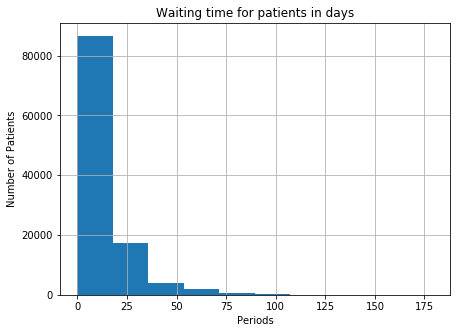

In [120]:
# check the histogram for the period field
draw_hist_chart(df_modified, 'Period', 'Waiting time for patients in days', 'Periods', 'Number of Patients');

>**This means most of periods lies between 0 and 30 , very few periods more than 30 days**

### what is the percentage of No-show attendence?

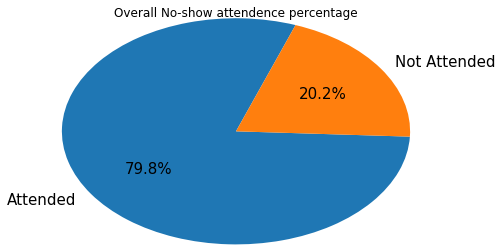

In [113]:
#show the overall attendence
draw_pie_charts(df_modified, 'No_show', ['Attended', 'Not Attended'], 'Overall No-show attendence percentage');

>but to be more Accurate we will work only in the 62299 unique patients instead of 110527 rows while there is duplicate

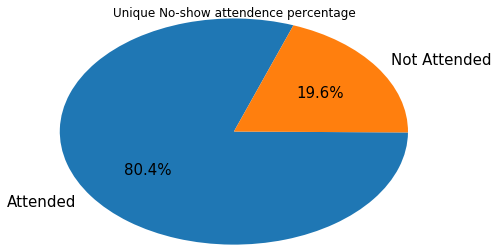

In [112]:
# check the percentage of 
df_unique = df_modified[df_modified['Patient_Id'].duplicated()==False] # get the unique rows
df_unique['Patient_Id'].duplicated().value_counts()
draw_pie_charts(df_unique, 'No_show', ['Attended', 'Not Attended'], 'Unique No-show attendence percentage');

>**There is no more Difference**

### what is the percentage of gender ?

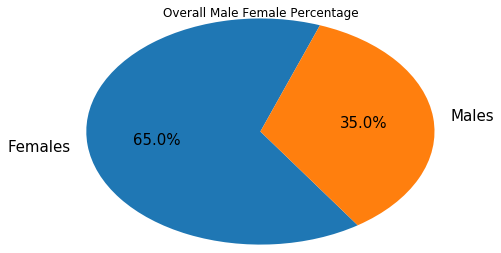

In [111]:
#check overall gender on the data
draw_pie_charts(df_modified, 'Sex', ['Females', 'Males'], 'Overall Male Female Percentage');

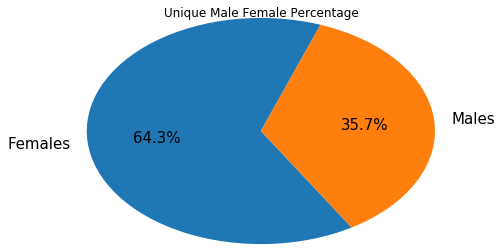

In [110]:
# check the gender from unique values only
draw_pie_charts(df_unique, 'Sex', ['Females', 'Males'], 'Unique Male Female Percentage');

In [45]:
# gender statistics
print(df_unique['Sex'].value_counts()) 
print(df_modified['Sex'].value_counts())

F    40046
M    22253
Name: Sex, dtype: int64
F    71840
M    38687
Name: Sex, dtype: int64


>**no big difference between working on all data and unique rows**

### what is the percentage of patients have HiperTension ?

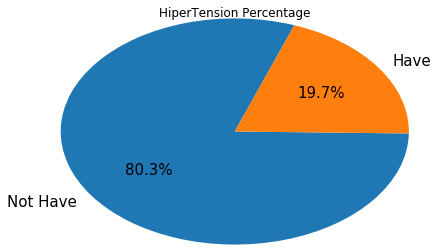

In [109]:
# overall data
draw_pie_charts(df_modified, 'HIP', ['Not Have', 'Have'], 'HiperTension Percentage');

>**The patients who not have HiperTension is more than patients that have HiperTension**

### what is the percentage of patients have Diabetes ?

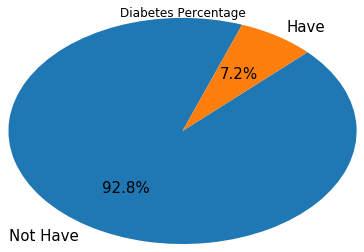

In [108]:
# over all data
draw_pie_charts(df_modified, 'DIAB', ['Not Have', 'Have'], 'Diabetes Percentage');

>**The patients who not have Diabetes is more than patients that have Diabetes**

### what is the percentage of patients that drink Alchol ?


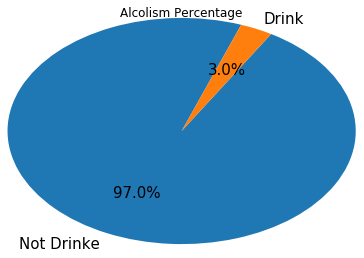

In [114]:
# check overall data
draw_pie_charts(df_modified, 'ALCO', ['Not Drinke', 'Drink'], 'Alcolism Percentage');

>**The patients who not drink Alcol is more than patients that drink Alcol**

### what is the percentage of patients have Scholarship?


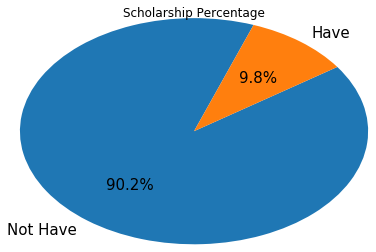

In [115]:
# check overall data
draw_pie_charts(df_modified, 'Scholar', ['Not Have', 'Have'], 'Scholarship Percentage');

>**The patients who not have scholarship is more than patients that have**

### what is the percentage of patients that recieved sms ?


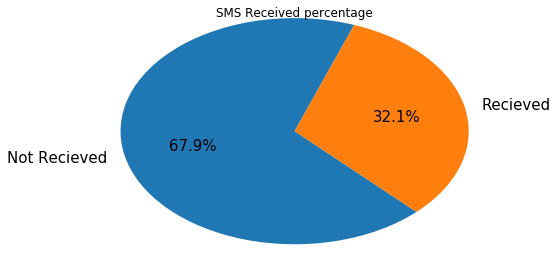

In [116]:
# check overall data
draw_pie_charts(df_modified, 'SMS', ['Not Recieved', 'Recieved'], 'SMS Received percentage');

>**The patients that not received sms are more than who received sms**

### what is the distribution of patients ages ?

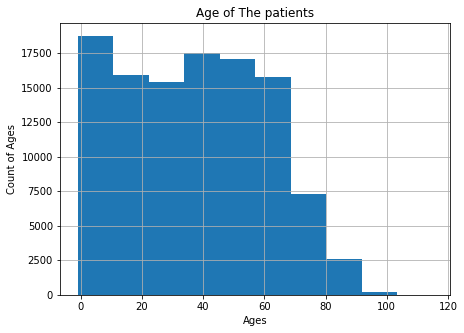

In [51]:
fig = plt.figure(figsize = (7,5))
ax = fig.gca()
df_modified['Age'].hist(ax=ax);
plt.title('Age of The patients')
plt.xlabel('Ages')
plt.ylabel('Count of Ages');

>**the most ages lies between 0 and 20 in addition to 40 and 57 from the histogram**

### what is the effect of age on no-show attribute  ?

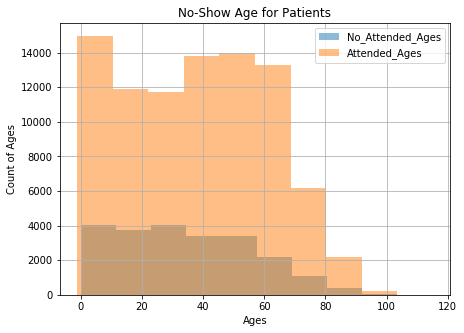

In [52]:
# relation between  No-Show and age 
show_yes = df_modified.No_show=='Yes'
show_no = df_modified.No_show=='No'
fig = plt.figure(figsize = (7,5))
ax = fig.gca()
df_modified.Age[show_yes].hist(alpha=0.5, label='No_Attended_Ages', ax=ax)
df_modified.Age[show_no].hist(alpha=0.5, label='Attended_Ages', ax=ax)
plt.xlabel('Ages')
plt.ylabel('Count of Ages')
plt.title('No-Show Age for Patients')
plt.legend();

### what is the correlation between age and on no-show attribute  ?

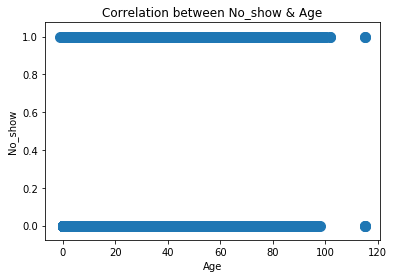

In [53]:
# df_modified_cor another dataframe because we cannot find correlation between string and numeric
# must convert no show attribute to numeric value so we did a new dataframe holds this attribute
# in numeric value No--> 1 for Attended patient and Yes-->0 for not Attended patient
df_modified_cor = df_modified.copy()
df_modified_cor.loc[df_modified_cor['No_show'] =='No', 'No_show'] = 1
df_modified_cor.loc[df_modified_cor['No_show'] =='Yes', 'No_show'] = 0
df_modified_cor.plot.scatter(x = 'Age', y = 'No_show', s = 100, title='Correlation between No_show & Age');

>**Scatter plot is not effective for this case with No_show attribute**

### what is the effect of period on no-show attribute?

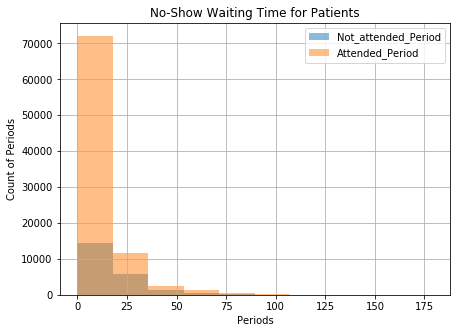

In [54]:
fig = plt.figure(figsize = (7,5))
ax = fig.gca()
df_modified.Period[show_yes].hist(alpha=0.5, label='Not_attended_Period', ax=ax)
df_modified.Period[show_no].hist(alpha=0.5, label='Attended_Period', ax=ax)
plt.xlabel('Periods')
plt.ylabel('Count of Periods')
plt.title('No-Show Waiting Time for Patients')
plt.legend();

**when the period increase the attendence decreases**

### what is the correlation between  age and period?

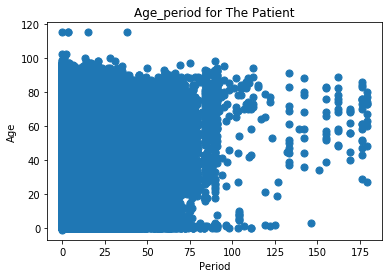

In [55]:
# age and period relation correlation
df_modified_cor.plot.scatter(x = 'Period', y = 'Age', s = 50, title='Age_period for The Patient');

>**cannot determine the relation from this chart**

### what is the effect of gender on no-show attribute?

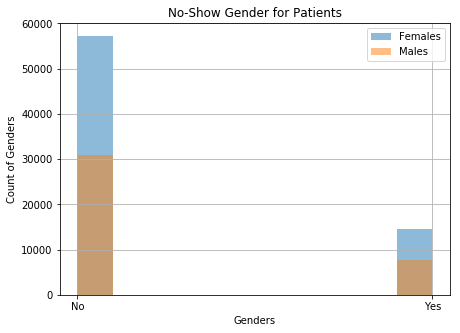

In [56]:
# relation between no-show and gender
female = df_modified.Sex=='F'
male = df_modified.Sex=='M'
fig = plt.figure(figsize = (7,5))
ax = fig.gca()
df_modified.No_show[female].hist(alpha=0.5, label='Females', ax=ax)
df_modified.No_show[male].hist(alpha=0.5, label='Males',ax=ax)
plt.xlabel('Genders')
plt.ylabel('Count of Genders')
plt.title('No-Show Gender for Patients')
plt.legend();

>**There is no relation between the gender and no-show attributes**



### what is the effect of handicap on no-show attribute?

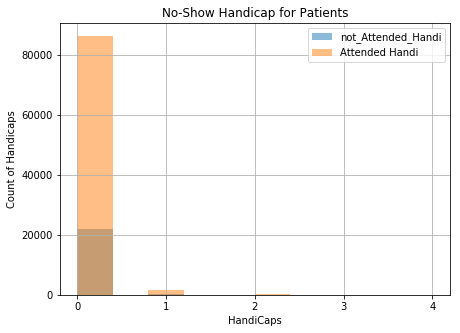

In [57]:
fig = plt.figure(figsize = (7,5))
ax = fig.gca()
df_modified.Handicap[show_yes].hist(alpha=0.5, label='not_Attended_Handi',ax=ax)
df_modified.Handicap[show_no].hist(alpha=0.5, label='Attended Handi',ax=ax)
plt.xlabel('HandiCaps')
plt.ylabel('Count of Handicaps')
plt.title('No-Show Handicap for Patients')
plt.xticks([0,1, 2, 3, 4])
plt.legend();

>**there is no effect on no-show from handicap degree for the patient, also most of people not have handicap**

In [58]:
df_unique['Location'].describe() # get the top location that contains more patients

count              62299
unique                81
top       JARDIM CAMBURI
freq                4192
Name: Location, dtype: object

<a id='conclusions'></a>
## Conclusions

> <ul><li>The percentage of attended patients are more than not attended patients</li>
    <li>The percentage of females more than percentage of males</li>
    <li>The percentage of non-Scolarship patients more than percentage of Scolarship patients</li>
    <li>The percentage of non-Alcholic patients more than percentage of Alcolic patients</li>
    <li>The percentage of non-Handicap patients more than percentage of Handicap patients</li>
    <li>The most ages lies between 0 and 20 in addition to 40 and 57 from the histogram</li>
    <li>The patients that not received sms are more than who received sms</li>
    <li>There is no effect from ages of patients and no-show attributes</li>
    <li>There is no correlation between age and period attributes</li>
    <li>There is no correlation between age and no-show attributes</li>
    <li>When the period increase the attendence of the patients decreases</li>
    <li>There is no relation between the gender and no-show attributes</li>
</ul>

>**Depednant variables : No-show variable <br>
Independeant Variaples: Age , period, Handicap and gender(sex)**

### Limitations

> **1-To analyze age correctly need to make categories for them such as for age:<br>
     childhood --> (0-15), Teenagers(16-29), Adult(30-65) and old(>65) categories<br>
2- To analyze Period correctly need to make categories for them such as: <br>
    instant-->(0), smal-->(1-15) , medium (6-50) , large (51-100) and very large >(100) days<br>
3-Scatter plot is not effective respect to this data set, so cannot build decession from it<br>
4-Not accurate decessions due to lack of statistical tools and measures**



In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0